In [65]:
import pandas as pd
import plotly.graph_objects as go
import cufflinks as cf
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

df=pd.read_parquet(f'../data/processed/df.parquet')


In [66]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [67]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    40455 non-null  float64 
 1   cut      40455 non-null  category
 2   color    40455 non-null  category
 3   clarity  40455 non-null  category
 4   depth    40455 non-null  float64 
 5   table    40455 non-null  float64 
 6   price    40455 non-null  int64   
 7   x        40455 non-null  float64 
 8   y        40455 non-null  float64 
 9   z        40455 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 2.3 MB


In [68]:
df['cut_int']=''

df.loc[df['cut']=='Fair','cut_int']=1

df.loc[df['cut']=='Good','cut_int']=2

df.loc[df['cut']=='Very Good','cut_int']=3

df.loc[df['cut']=='Premium','cut_int']=4

df.loc[df['cut']=='Ideal','cut_int']=5

df['cut_int'] = df['cut_int'].astype('int64')

In [69]:
df['color'].unique()

[J, H, G, D, F, E, I]
Categories (7, object): [J, H, G, D, F, E, I]

In [70]:
df['color_int']=''

df.loc[df['color']=='J','color_int']=1
df.loc[df['color']=='I','color_int']=2
df.loc[df['color']=='H','color_int']=3
df.loc[df['color']=='G','color_int']=4
df.loc[df['color']=='F','color_int']=5
df.loc[df['color']=='E','color_int']=6
df.loc[df['color']=='D','color_int']=7


df['color_int'] = df['color_int'].astype('int64')

In [71]:
df['clarity'].unique()

[VS2, VS1, SI1, SI2, IF, VVS1, VVS2, I1]
Categories (8, object): [VS2, VS1, SI1, SI2, IF, VVS1, VVS2, I1]

In [72]:
df['clarity_int']=''

df.loc[df['clarity']=='I1','clarity_int']=1
df.loc[df['clarity']=='SI1','clarity_int']=2
df.loc[df['clarity']=='SI2','clarity_int']=3
df.loc[df['clarity']=='VS1','clarity_int']=4
df.loc[df['clarity']=='VS2','clarity_int']=5
df.loc[df['clarity']=='VVS1','clarity_int']=6
df.loc[df['clarity']=='VVS2','clarity_int']=7
df.loc[df['clarity']=='IF','clarity_int']=8


df['clarity_int'] = df['clarity_int'].astype('int64')

In [73]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,4,1,5
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,3,5
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,1,4,4
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,7,2
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,5,4,4
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,2,5,3
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5,3,2
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,5,1,4


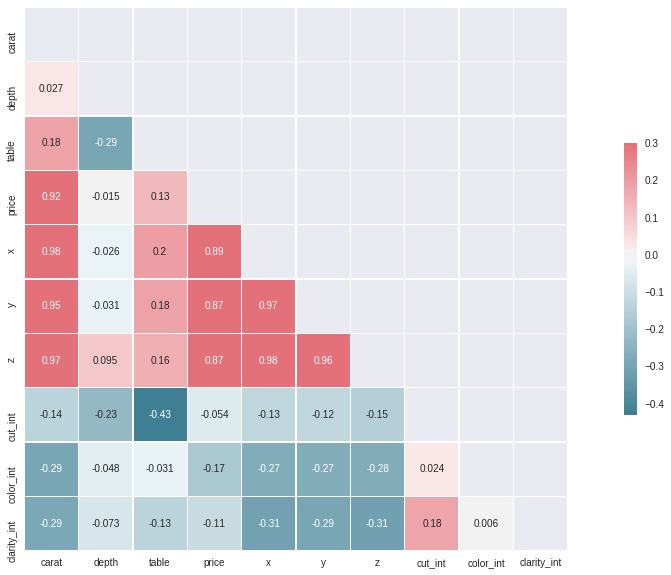

In [74]:
dft=df.corr()
mask = np.triu(np.ones_like(dft, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dft, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [75]:
dft=df.iloc[:100,:]

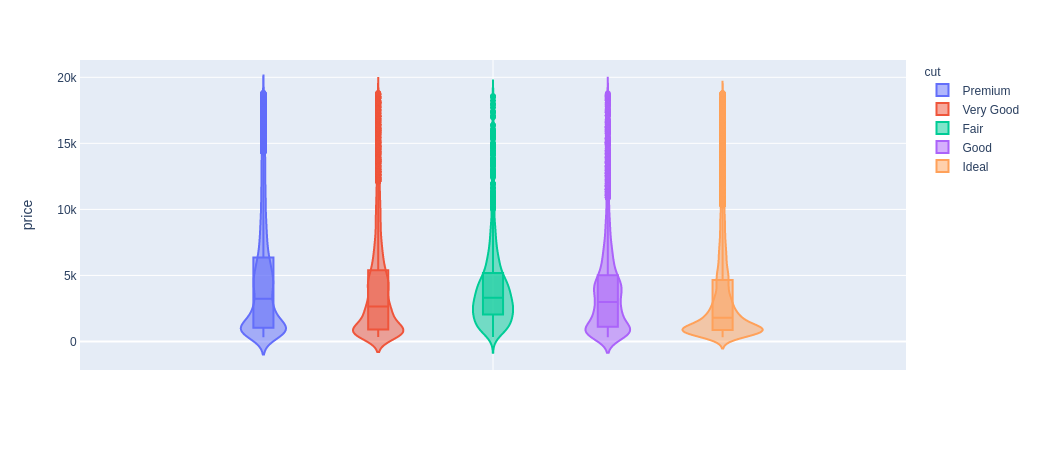

In [92]:
# fig = go.Figure(data=go.Violin(y=df['price'],color='cut' ,box_visible=True,x0='price',meanline_visible=True,line_color='navy',fillcolor='lightsteelblue'))
fig = px.violin(df, y="price", color="cut", box=True)
fig.show()

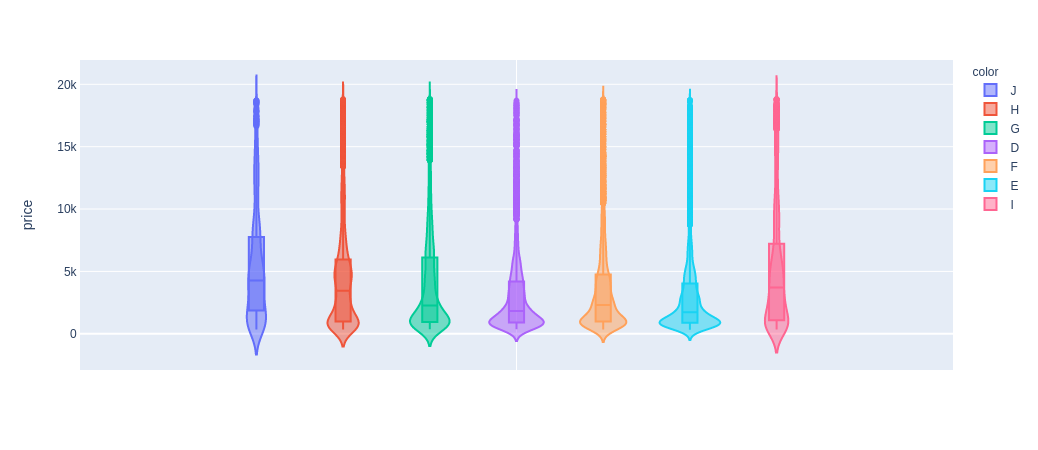

In [93]:
fig = px.violin(df, y="price", color="color", box=True)
fig.show()

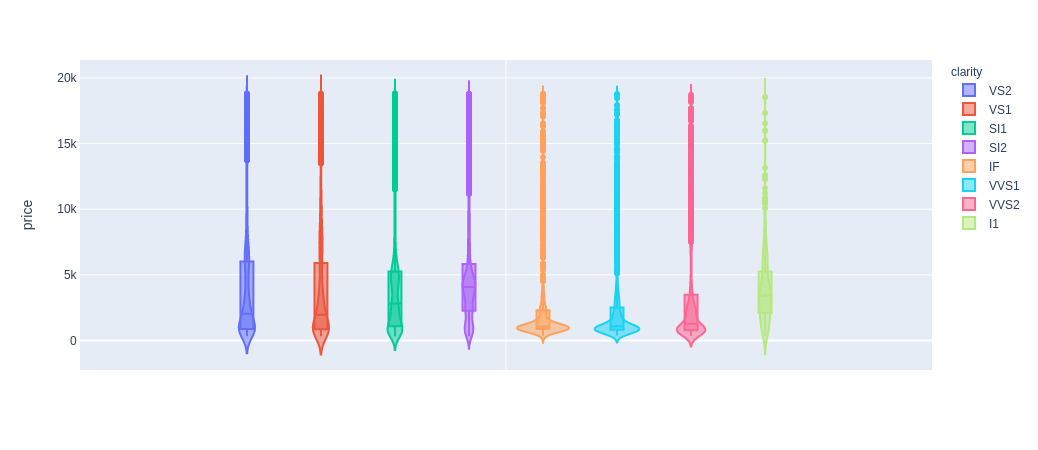

In [94]:
fig = px.violin(df, y="price", color="clarity", box=True)
fig.show()

In [96]:
df2=pd.cut(df['carat'], bins=5)

In [98]:
df['carat_int']=df2

In [99]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,color_int,clarity_int,carat_int
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,4,1,5,"(1.06, 1.92]"
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,3,3,5,"(0.196, 1.06]"
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,1,4,4,"(0.196, 1.06]"
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,2,7,2,"(0.196, 1.06]"
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,5,4,2,"(0.196, 1.06]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,5,4,4,"(1.06, 1.92]"
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,2,5,3,"(1.92, 2.78]"
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,5,3,2,"(0.196, 1.06]"
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,5,1,4,"(0.196, 1.06]"


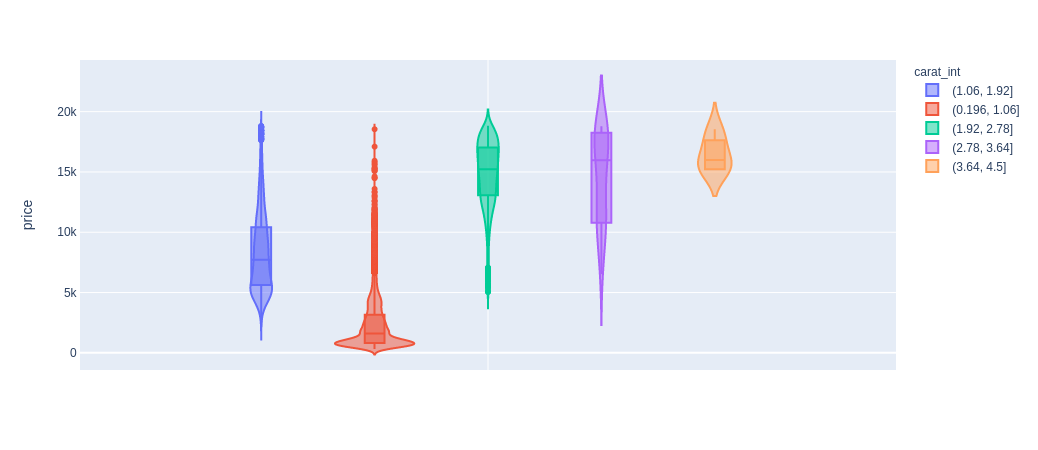

In [100]:
fig = px.violin(df, y="price", color="carat_int", box=True)
fig.show()

In [ ]:
fig = plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='price', y='carat')
plt.title(label='Retail Sales summed by Item Type')
plt.show()